### Import required Libraries

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

### Read data file

In [53]:
# Data Source : https://www.kaggle.com/datasets/oktayrdeki/heart-disease

df = pd.read_csv ('heart_disease.csv')
# Display first few rows
print(df.columns)

Index(['Age', 'Gender', 'Blood Pressure', 'Cholesterol Level',
       'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'BMI',
       'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
       'Alcohol Consumption', 'Stress Level', 'Sleep Hours',
       'Sugar Consumption', 'Triglyceride Level', 'Fasting Blood Sugar',
       'CRP Level', 'Homocysteine Level', 'Heart Disease Status'],
      dtype='object')


### Variable Selection

Selecting following Quantitative variables for my Analysis

- Age – Older individuals generally have a higher risk of heart disease.
- Blood Pressure – High blood pressure (hypertension) is a major risk factor for heart attacks.
- Cholesterol Level – Elevated cholesterol, especially high LDL and low HDL levels, increases heart disease risk.
- Triglyceride Level – High triglyceride levels are linked to a greater likelihood of heart disease.
- BMI (Body Mass Index) – Obesity or an unhealthy BMI is a significant risk factor for cardiovascular disease.

### Historgram and Outliers

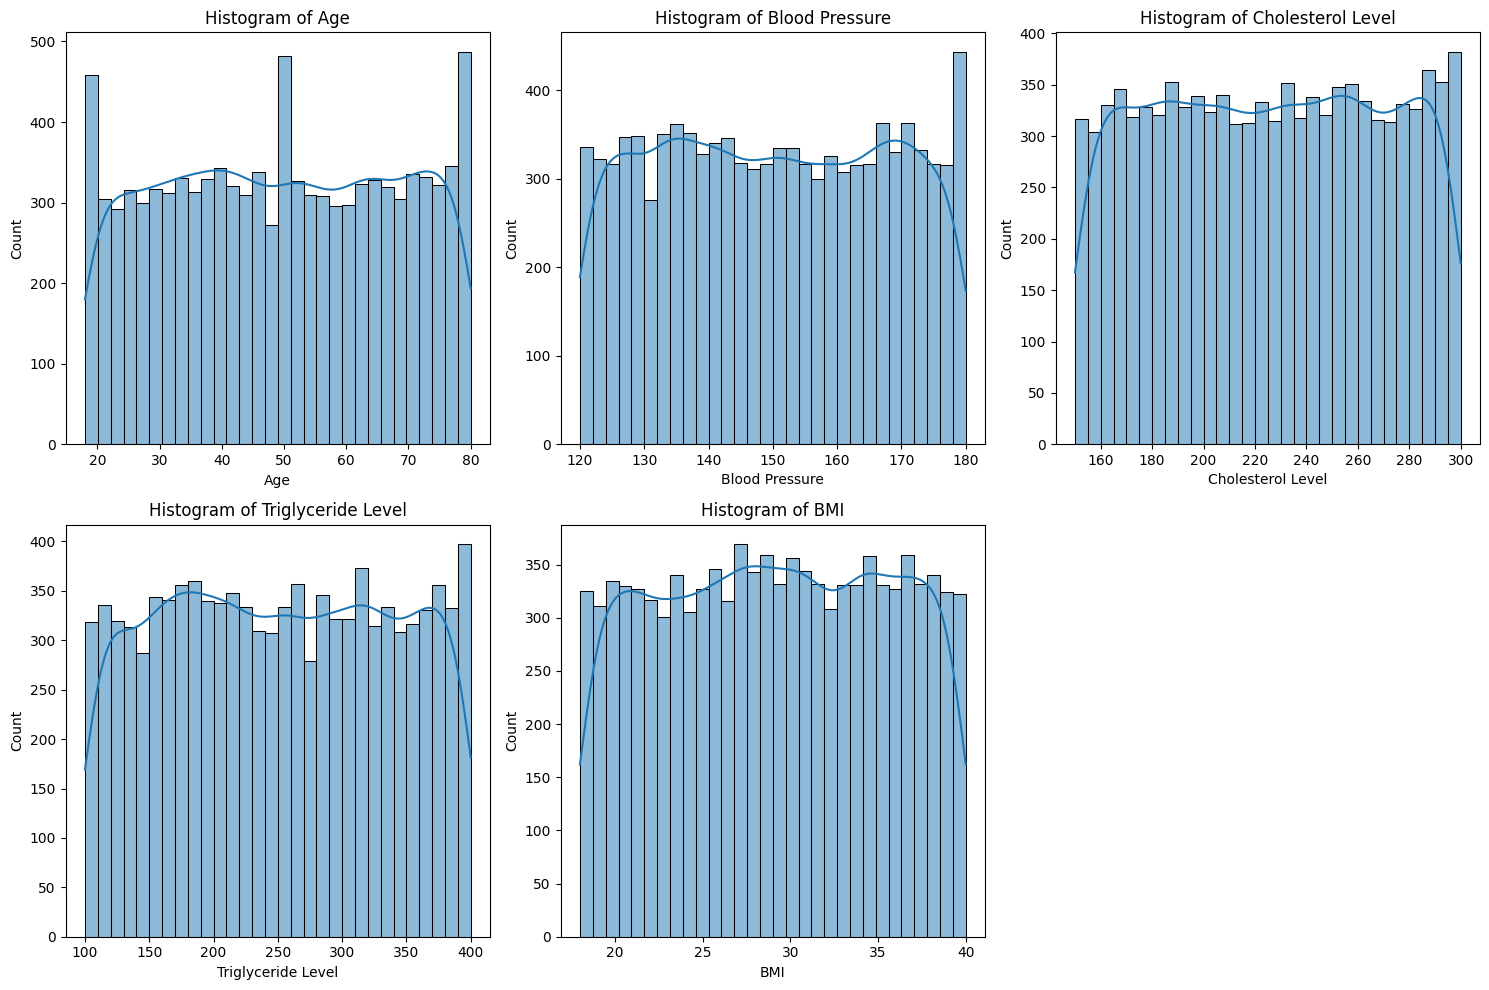

In [54]:
# Selected quantitative variables
quantitative_vars = ['Age', 'Blood Pressure', 'Cholesterol Level', 'Triglyceride Level', 'BMI']

# Generate histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(quantitative_vars, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    
plt.tight_layout()
plt.show()

#### Findings

- No severe skewness is apparent, suggesting relatively normal distributions.
- The presence of peaks at specific points (especially in Age) might indicate grouping effects.
- Potential outliers exist in blood pressure, cholesterol, and BMI, requiring further analysis.

#### Histogram Interpretation

- Age: The distribution appears fairly uniform, but there are peaks at certain ages, likely due to binning effects or specific data collection patterns. The presence of extreme values at both ends (younger and older individuals) should be examined for potential outliers.

- Blood Pressure: The distribution spans a wide range, with higher density around the middle values. The rightmost values may indicate potential outliers, representing individuals with extremely high blood pressure.

- Cholesterol Level: The data is relatively spread out, with a consistent distribution across different levels. However, extremely high cholesterol values should be reviewed to assess their impact on analysis.

- Triglyceride Level: This variable also has a spread-out distribution. Any significant peaks at the higher end could indicate potential high-risk individuals.

- BMI: The data appears evenly distributed, but it is essential to investigate extremely high BMI values, which could indicate outliers or potential errors.


### Descriptive Characteristics

In [55]:
# Descriptive statistics
for var in quantitative_vars:
    mean_val = df[var].mean()
    mode_val = st.mode(df[var])
    spread = df[var].max() - df[var].min()
    skewness = df[var].skew()

    print(f"{var}:")
    print(f"  Mean: {mean_val:.4f}")
    print(f"  Mode: {mode_val:.4f}")
    print(f"  Spread (Range): {spread}")
    print(f"  Skewness (Tail Direction): {'Right-Skewed' if skewness > 0 else 'Left-Skewed' if skewness < 0 else 'Symmetric'}\n")

Age:
  Mean: 49.2963
  Mode: 71.0000
  Spread (Range): 62.0
  Skewness (Tail Direction): Left-Skewed

Blood Pressure:
  Mean: 149.7577
  Mode: 134.0000
  Spread (Range): 60.0
  Skewness (Tail Direction): Right-Skewed

Cholesterol Level:
  Mean: 225.4256
  Mode: 292.0000
  Spread (Range): 150.0
  Skewness (Tail Direction): Left-Skewed

Triglyceride Level:
  Mean: 250.7344
  Mode: 307.0000
  Spread (Range): 300.0
  Skewness (Tail Direction): Right-Skewed

BMI:
  Mean: 29.0773
  Mode: 24.9916
  Spread (Range): 21.99411685290619
  Skewness (Tail Direction): Left-Skewed



#### Findings

1. Age
- Mean (49.3 years): The average age of individuals in the dataset is around 49 years.
- Mode (71 years): The most frequently occurring age is 71, indicating that a significant number of individuals in the dataset are older.
- Spread (62 years): The age range is quite large (from youngest to oldest).
- Skewness (Left-Skewed): More data points are concentrated toward older ages, suggesting a higher number of older individuals in the dataset.

2. Blood Pressure
- Mean (149.76 mmHg): The average blood pressure is relatively high, possibly indicating that many individuals in the dataset have hypertension.
- Mode (134 mmHg): The most common blood pressure value is 134 mmHg, which is in the prehypertension range.
- Spread (60 mmHg): There is a considerable range of blood pressure values.
- Skewness (Right-Skewed): There are extreme high values, suggesting some individuals have significantly higher blood pressure levels.

3. Cholesterol Level
- Mean (225.43 mg/dL): The average cholesterol level is above 200 mg/dL, indicating that many individuals may have elevated cholesterol levels.
- Mode (292 mg/dL): The most frequently occurring value is high, which suggests a significant number of people have high cholesterol.
- Spread (150 mg/dL): Cholesterol values vary significantly.
- Skewness (Left-Skewed): More individuals have lower cholesterol levels, but some still have extremely high values.

4. Triglyceride Level
- Mean (250.73 mg/dL): The average triglyceride level is quite high, as normal levels are typically below 150 mg/dL.
- Mode (307 mg/dL): A significant number of people have high triglyceride levels.
- Spread (300 mg/dL): There is a large variation in triglyceride levels.
- Skewness (Right-Skewed): Some individuals have extremely high triglyceride levels, pulling the distribution toward the right.

5. BMI (Body Mass Index)
- Mean (29.08): The average BMI is close to the threshold of obesity (≥30), suggesting a generally overweight population.
- Mode (24.99): The most frequent BMI is around 25, which is on the edge of the normal weight category.
- Spread (21.99): The range is relatively broad, indicating a mix of underweight, normal, overweight, and obese individuals.
- Skewness (Left-Skewed): A higher concentration of individuals have a BMI in the overweight and obese range, with fewer individuals on the lower end.

### Scenario Comparision using PMF

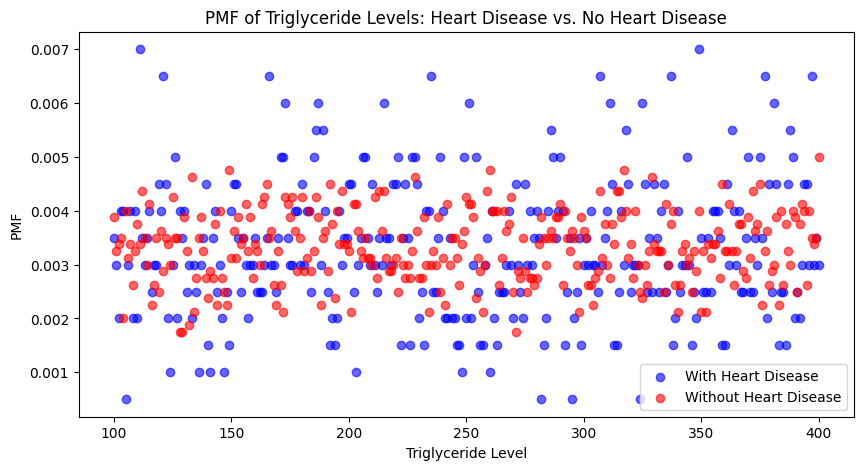

In [56]:
# Define the two scenarios
group_1 = df[df['Heart Disease Status'] == 'Yes']['Triglyceride Level']
group_2 = df[df['Heart Disease Status'] == 'No']['Triglyceride Level']

# Function to compute PMF
def compute_pmf(data):
    values, counts = np.unique(data, return_counts=True)
    pmf = counts / counts.sum()
    return values, pmf

# Compute PMF for both scenarios
values_1, pmf_1 = compute_pmf(group_1)
values_2, pmf_2 = compute_pmf(group_2)

# Plot the PMFs
plt.figure(figsize=(10, 5))
plt.scatter(values_1, pmf_1, color='blue', alpha=0.6, label='With Heart Disease')
plt.scatter(values_2, pmf_2, color='red', alpha=0.6, label='Without Heart Disease')
plt.xlabel('Triglyceride Level')
plt.ylabel('PMF')
plt.title('PMF of Triglyceride Levels: Heart Disease vs. No Heart Disease')
plt.legend()
plt.show()

#### Findings
- The blue points (heart disease group) seem to be slightly more concentrated at higher triglyceride levels.
- The red points (no heart disease group) appear to be more evenly distributed across lower and middle triglyceride levels.
- Higher triglyceride levels might be more frequently associated with individuals who have heart disease.
- There is some overlap between both groups, indicating that triglyceride levels alone might not be a perfect predictor of heart disease.
- There are still some individuals without heart disease who have high triglyceride levels, but their frequency is lower compared to those with heart disease.

### CDF

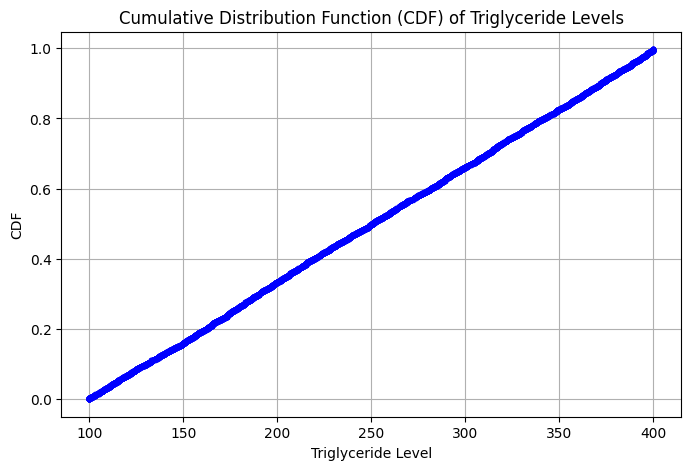

In [57]:
# Choose variable for CDF (Triglyceride Level)
data = df['Triglyceride Level'].sort_values()

# Compute CDF
cdf = np.arange(1, len(data) + 1) / len(data)

# Plot the CDF
plt.figure(figsize=(8, 5))
plt.plot(data, cdf, marker='.', linestyle='none', color='blue')
plt.xlabel('Triglyceride Level')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function (CDF) of Triglyceride Levels')
plt.grid()
plt.show()